# Index
- Import Libraries
- Import Data
- Data Processing
- EDA


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [3]:
books_df = pd.read_csv(r"C:\Users\anshulgarg\OneDrive - Rivian Automotive, LLC\Desktop\Anshul@Rivian\ML\Book Recommendation Dataset\Books.csv")
ratings_df = pd.read_csv(r"C:\Users\anshulgarg\OneDrive - Rivian Automotive, LLC\Desktop\Anshul@Rivian\ML\Book Recommendation Dataset\Ratings.csv")
users_df = pd.read_csv(r"C:\Users\anshulgarg\OneDrive - Rivian Automotive, LLC\Desktop\Anshul@Rivian\ML\Book Recommendation Dataset\Users.csv")

C:\Users\anshulgarg\AppData\Local\Temp\ipykernel_97104\1010616865.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(r"C:\Users\anshulgarg\OneDrive - Rivian Automotive, LLC\Desktop\Anshul@Rivian\ML\Book Recommendation Dataset\Books.csv")


# Data Processing

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [6]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings_df[['User-ID','ISBN']].duplicated().sum()

0

In [9]:
# There are dulicates b/w users and books in rating dataframe

In [10]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
check_df = pd.merge(ratings_df, books_df, on='ISBN', how='right')
check_df[check_df['User-ID'].isnull()][['ISBN']].drop_duplicates().count()

ISBN    1209
dtype: int64

In [12]:
# There are 1209 Books that do not have any user rating

In [13]:
final_df = pd.merge(ratings_df, books_df, on='ISBN', how='left')
final_df = pd.merge(final_df, users_df, on= 'User-ID', how='left')
final_df.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN


In [14]:
final_df.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118646
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
Location                    0
Age                    309492
dtype: int64

In [15]:
final_df[final_df['Book-Title'].isnull()]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
6,276736,3257224281,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"salzburg, salzburg, austria",NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"sydney, new south wales, australia",14.0
9,276745,342310538,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"berlin, berlin, germany",27.0
25,276748,3442437407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jubail ind.-city, eastern province, saudi arabia",39.0
26,276751,033390804X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"zuerich, zh, switzerland",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1149444,276675,0747252327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"mooroolbark, victoria, australia",57.0
1149446,276679,8804413530,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"beverly hills, yukon territory, vietnam",NaN
1149581,276680,0679781587,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hopewell junction, new york, usa",55.0
1149758,276697,8445072897,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"oviedo, asturias, spain",29.0


In [16]:
final_df[final_df['Book-Title'].isnull()][['ISBN','Book-Rating']].groupby('ISBN').count().reset_index().sort_values('Book-Rating', ascending=False)

,ISBN,Book-Rating
21399,0679781587,639
25296,0749397543,160
16172,0552124753,127
2761,0091867770,112
3513,0099387913,95
...,...,...
28678,0851106374,1
28679,0851108458,1
28680,085112027X,1
28682,0851162673,1


In [17]:
final_df.shape

(1149780, 12)

In [18]:
118644/1149780

0.1031884360486354

In [19]:
# There are 118644 (10%) records in rating dataset that cannot be linked with books dataset as 70405 Book Id(ISBN) in rating table does exist in books dataset
# Exlcuding these records

final_df = final_df[~final_df['Book-Title'].isnull()]
final_df.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [20]:
final_df.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
Location                    0
Age                    277835
dtype: int64

In [21]:
final_df[final_df['Book-Author'].isnull()]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
273117,63714,0751352497,10,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,"milton keynes, england, united kingdom",29.0
412805,98647,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,"selayang, selangor, malaysia",26.0


In [22]:
final_df = final_df[~final_df['Publisher'].isnull()]

In [23]:
final_df.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   0
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
Location                    0
Age                    277835
dtype: int64

In [24]:
final_df = final_df[~final_df['Publisher'].isnull()]

In [25]:
final_df = final_df[~final_df['Book-Author'].isnull()]

In [26]:
final_df[final_df['Image-URL-L'].isnull()]

# seems like for 4 rows in book dataframe, values got dispalced by 1 column. Looks like Book Author column values are missing and not Image-URL-L
# however, these are just 4 records, and can be excluded

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
544234,130571,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN,"summerville, south carolina, usa",NaN
570994,137190,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN,"rennes, bretagne, france",31.0
695308,169663,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,"towson, maryland, usa",NaN
941170,227771,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN,"savion, n/a, israel",19.0


In [27]:
final_df = final_df[~final_df['Image-URL-L'].isnull()]

In [28]:
final_df.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
Location                    0
Age                    277833
dtype: int64

In [29]:
final_df.shape

(1031128, 12)

In [30]:
277833/1031128

0.26944569442397065

In [31]:
# There are 27% records in rating dataframe when linked with book dataframe has age value missing. 
# We can exlucde these, however, we will loose 27% of records. Let's make a decision later as we might determine age feature can be skipped as there are other features that can help in making a recommendation.


In [32]:
final_df['Year-Of-Publication'] = final_df['Year-Of-Publication'].astype('int')

In [33]:
final_df.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication      int32
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
Location                object
Age                    float64
dtype: object

# EDA

In [34]:
final_df.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN


In [35]:
final_df['Book-Title'].value_counts()

Book-Title
Wild Animus                                                                   2502
The Lovely Bones: A Novel                                                     1295
The Da Vinci Code                                                              898
A Painted House                                                                838
The Nanny Diaries: A Novel                                                     828
                                                                              ... 
Asphyxie                                                                         1
Marathon : The Ultimate Training Guide                                           1
Pearl Jam and Eddie Vedder: None Too Fragile                                     1
Milk It!: Collected Musings on the Alternative Music Explosion of the '90s       1
Perplexing Lateral Thinking Puzzles: Scholastic Edition                          1
Name: count, Length: 241065, dtype: int64

In [36]:
user_count_df = final_df['User-ID'].value_counts().reset_index()
user_count_df['Count_%'] = round(user_count_df['count']/user_count_df['count'].sum()*100,2)
user_count_df

,User-ID,count,Count_%
0,11676,11144,1.08
1,198711,6456,0.63
2,153662,5814,0.56
3,98391,5777,0.56
4,35859,5646,0.55
...,...,...,...
92101,116792,1,0.00
92102,116798,1,0.00
92103,116801,1,0.00
92104,116810,1,0.00


<Axes: xlabel='User-ID'>

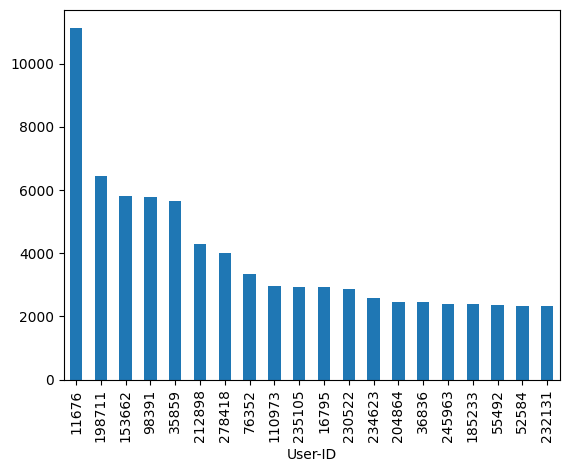

In [37]:
final_df['User-ID'].value_counts()[:20].plot(kind='bar')

In [38]:
# There are some users that given exceptioanlly more ratings than the others. Like user '11676'. 
# This can lead to bias as recommendation could be based on these users rating.

In [39]:
final_df['ISBN'].value_counts().reset_index()

,ISBN,count
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723
...,...,...
270139,0739431536,1
270140,1401300006,1
270141,1568659830,1
270142,3596221323,1


In [40]:
final_df['Year-Of-Publication'].value_counts().reset_index().sort_values('Year-Of-Publication')[:10]

,Year-Of-Publication,count
19,0,14009
110,1376,1
114,1378,1
107,1806,1
108,1897,1
89,1900,4
84,1901,7
78,1902,10
101,1904,1
102,1906,1


In [41]:
books_df[books_df['Year-Of-Publication']==0].shape

(3570, 8)

In [42]:
books_df.shape

(271360, 8)

In [43]:
(3570/271360)*100


1.3155955188679245

In [44]:
# some of the records have 'Year-Of-Publication' which are greater than 2004. Since the data was collected in 2004, year later than 2004 cannot be possible.
# Also, there are some years like 1376 and 1378. Altough books from those year are possible, but these records might be incorrect. 
# There are 3570 books (1.3%) dataframe where 'Year-Of-Publication' is not known.

In [45]:
final_df['Book-Rating'].value_counts()[:]

Book-Rating
0     647291
8      91803
10     71224
7      66401
9      60776
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64

In [46]:
final_df['Book-Rating'].shape

(1031128,)

In [47]:
647291/1031128

0.6277503859850572

In [48]:
br_df = final_df[['ISBN','Book-Rating']].drop_duplicates()
br_df

,ISBN,Book-Rating
0,034545104X,0
1,0155061224,5
2,0446520802,0
3,052165615X,3
4,0521795028,6
...,...,...
1149762,0380796155,5
1149770,0679752714,0
1149773,0806917695,5
1149775,1563526298,9


In [49]:
br_df['Book-Rating'].value_counts()[:]

Book-Rating
0     201620
8      51143
10     42213
7      41444
9      36211
5      33424
6      23153
4       6594
3       4471
2       2132
1       1338
Name: count, dtype: int64

In [50]:
201620/443743

# 45% of books did not receive any rating

0.454362096979558

# Top 50 Books

In [95]:
top50_books_df = final_df.groupby('ISBN').agg({'User-ID': 'count', 'Book-Rating': 'mean'}).reset_index()
top50_books_df.rename(columns={'User-ID':'Rating_Count'}, inplace=True)
top50_books_df = top50_books_df.sort_values('Rating_Count', ascending=False)
top50_books_df['Book-Rating'] = (top50_books_df['Book-Rating']/2).round(1)
top50_books_df

,ISBN,Rating_Count,Book-Rating
215949,0971880107,2502,0.5
38570,0316666343,1295,2.2
70798,0385504209,883,2.3
7344,0060928336,732,1.7
32370,0312195516,723,2.2
...,...,...,...
127829,0590661094,1,0.0
127830,0590661388,1,3.5
127832,0590662082,1,0.0
127833,059066218X,1,0.0


array([[<Axes: title={'center': 'Rating_Count'}>]], dtype=object)

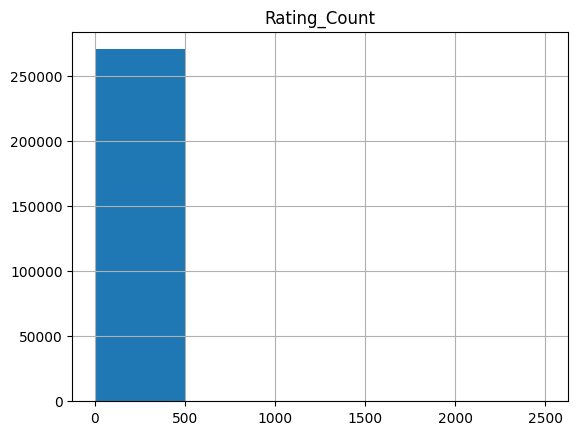

In [96]:
top50_books_df[['Rating_Count']].hist(bins=5)

In [97]:
top50_books_df = top50_books_df[top50_books_df['Rating_Count']>50]
top50_books_df

,ISBN,Rating_Count,Book-Rating
215949,0971880107,2502,0.5
38570,0316666343,1295,2.2
70798,0385504209,883,2.3
7344,0060928336,732,1.7
32370,0312195516,723,2.2
...,...,...,...
85671,0440173922,51,0.7
44452,0345387554,51,1.2
45085,0345420748,51,1.0
21453,0142004278,51,1.4


In [98]:
top50_books_df = top50_books_df.sort_values('Book-Rating', ascending=False).head(50)
top50_books_df

,ISBN,Rating_Count,Book-Rating
236924,1844262553,54,4.0
83867,0439139597,194,3.3
83625,0439064864,170,3.3
83846,0439136350,197,3.2
125011,0590353403,168,3.2
68331,0385199570,57,3.1
129842,0618002227,63,3.1
198053,0877017883,72,3.0
23351,0156528207,79,2.9
74683,039480001X,52,2.9


In [99]:
top50_books_df = pd.merge(top50_books_df, books_df[['ISBN','Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L']], on='ISBN', how='left')
top50_books_df

,ISBN,Rating_Count,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,1844262553,54,4.0,Free,Paul Vincent,2003,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...
1,0439139597,194,3.3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
2,0439064864,170,3.3,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...
3,0439136350,197,3.2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
4,0590353403,168,3.2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
5,0385199570,57,3.1,The Stand (The Complete and Uncut Edition),Stephen King,1990,Doubleday Books,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...,http://images.amazon.com/images/P/0385199570.0...
6,0618002227,63,3.1,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002227.0...,http://images.amazon.com/images/P/0618002227.0...,http://images.amazon.com/images/P/0618002227.0...
7,0877017883,72,3.0,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,1991,Chronicle Books,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...,http://images.amazon.com/images/P/0877017883.0...
8,0156528207,79,2.9,The Little Prince,Antoine de Saint-ExupÃ©ry,1968,Harcourt,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...
9,039480001X,52,2.9,The Cat in the Hat,Dr. Seuss,1957,Random House Books for Young Readers,http://images.amazon.com/images/P/039480001X.0...,http://images.amazon.com/images/P/039480001X.0...,http://images.amazon.com/images/P/039480001X.0...


In [101]:
pickle.dump(top50_books_df, open(r'C:\Users\anshulgarg\PycharmProjects\book_recommend_web\book.pkl','wb'))

# Best 10 Recommendation

In [51]:
final_df = final_df[final_df['Book-Rating'] > 0]
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",NaN
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149771,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,"cedar park, texas, usa",NaN
1149773,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,http://images.amazon.com/images/P/0806917695.0...,"cedar park, texas, usa",NaN
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,"cedar park, texas, usa",NaN
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,"mannington, west virginia, usa",38.0


In [52]:
top_books_df = final_df.groupby('ISBN').count().reset_index().sort_values('Book-Rating', ascending=False)
top_books_df

,ISBN,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
21945,0316666343,707,707,707,707,707,707,707,707,707,707,473
117743,0971880107,581,581,581,581,581,581,581,581,581,581,473
38819,0385504209,487,487,487,487,487,487,487,487,487,487,373
18058,0312195516,383,383,383,383,383,383,383,383,383,383,227
4131,0060928336,320,320,320,320,320,320,320,320,320,320,203
...,...,...,...,...,...,...,...,...,...,...,...,...
63116,0553100130,1,1,1,1,1,1,1,1,1,1,1
63110,0553099817,1,1,1,1,1,1,1,1,1,1,1
63109,0553099809,1,1,1,1,1,1,1,1,1,1,0
63107,0553099744,1,1,1,1,1,1,1,1,1,1,1


In [53]:
top_books_list = top_books_df[top_books_df['User-ID']>5]['ISBN'].to_list()

In [54]:
len(top_books_list)

10731

In [55]:
final_df = final_df[final_df['ISBN'].isin(top_books_list)]
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",NaN
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0
19,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,"iowa city, iowa, usa",25.0
20,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,"iowa city, iowa, usa",25.0
28,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,"alberta beach, alberta, canada",19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149743,276688,0836218655,10,Wiener Dog Art,Gary Larson,1990,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218655.0...,http://images.amazon.com/images/P/0836218655.0...,http://images.amazon.com/images/P/0836218655.0...,"fort lee, new jersey, usa",NaN
1149744,276688,0836236688,10,Dilbert: Seven Years Of Highly Defective Peopl...,Scott Adams,1997,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836236688.0...,http://images.amazon.com/images/P/0836236688.0...,http://images.amazon.com/images/P/0836236688.0...,"fort lee, new jersey, usa",NaN
1149761,276704,0345386108,6,Winter Moon,Dean R. Koontz,1995,Ballantine Books,http://images.amazon.com/images/P/0345386108.0...,http://images.amazon.com/images/P/0345386108.0...,http://images.amazon.com/images/P/0345386108.0...,"cedar park, texas, usa",NaN
1149771,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,"cedar park, texas, usa",NaN


In [56]:
vector_df = final_df.pivot_table(values='Book-Rating', index='ISBN', columns='User-ID')


In [57]:
vector_df.fillna(0, inplace=True)

In [58]:
vector_df

User-ID,8,9,16,17,19,26,32,39,42,44,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002251760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002259834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002558122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006480764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950491036X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681500555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968150108X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
vector_array = cosine_similarity(vector_df)

In [61]:
vector_array.shape

(10731, 10731)

In [62]:
vector_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [64]:
np.sort(vector_array[:1][0])[::-1][1:11]

array([0.24795625, 0.21288003, 0.21252257, 0.20305659, 0.19532085,
       0.18950377, 0.18841185, 0.1880434 , 0.18722737, 0.18525062])

In [65]:
np.flip(np.argsort(vector_array[:1][0]))

array([   0, 1532, 3561, ..., 6670, 6671, 5365], dtype=int64)

In [66]:
books_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [71]:
'0195153448'

'0195153448'

In [67]:
v_df = vector_df.reset_index()
v_df

User-ID,ISBN,8,9,16,17,19,26,32,39,42,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
0,0002005018,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002251760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0002259834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0002558122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0006480764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,950491036X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10727,9681500555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10728,968150108X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10729,9681501225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
final_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')

In [115]:
vector_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [233]:
book_dict = {}
def recommend(book_name):
    top_book_name_list = []
    author_list = []
    publisher_list = []
    year_list = []
    image_list = []
    book_id = final_df[final_df['Book-Title']==book_name].iloc[0]['ISBN']
    # print(f'correspoding book_id is {book_id} for book {book_name}')
    v_df = vector_df.reset_index()
    vector_index = v_df.index[v_df['ISBN'] == book_id][0]
    top_book_cosine_value_array = np.sort(vector_array[vector_index])[::-1][1:11]
    top_book_cosine_index_array = np.flip(np.argsort(vector_array[vector_index]))[1:11]
    # print(f'top_book_cosine_value_array is {top_book_cosine_value_array}')
    # print(f'top_book_cosine_index_array is {top_book_cosine_index_array}')
    for k in top_book_cosine_index_array:
        # print(i)
        # print(v_df.iloc[[k]])
        # k = np.where(top_book_cosine_value_array == i)[0][0]
        top_book_name_list.append(final_df[final_df['ISBN']==v_df.iloc[k,0]]['Book-Title'].values[0]) 
        author_list.append(final_df[final_df['ISBN']==v_df.iloc[k,0]]['Book-Author'].values[0]) 
        publisher_list.append(final_df[final_df['ISBN']==v_df.iloc[k,0]]['Publisher'].values[0]) 
        year_list.append(final_df[final_df['ISBN']==v_df.iloc[k,0]]['Year-Of-Publication'].values[0]) 
        image_list.append(final_df[final_df['ISBN']==v_df.iloc[k,0]]['Image-URL-M'].values[0]) 
    book_dict = {
        'book_title_list': top_book_name_list,
        'Author_list': author_list,
        'publisher_list': publisher_list,
        'year_list': year_list,
        'image_list': image_list
    }
    return book_dict




# recommend('Lost Girls')
# recommend('Clara Callan')


In [125]:
choice_book_list = pd.merge(v_df[['ISBN']], books_df[['ISBN','Book-Title']], on='ISBN', how='left')
choice_book_list

,ISBN,Book-Title
0,0002005018,Clara Callan
1,0002251760,The Forgetting Room: A Fiction (Byzantium Book)
2,0002259834,Miss Wyoming Uk Edition
3,0002558122,Angelas Ashes
4,0006480764,Lost Girls
...,...,...
10726,950491036X,La Sombra del Viento
10727,9681500555,Diario de Ana Frank
10728,968150108X,20 Poemas De Amor Y Una Cancion Deseperada/20 ...
10729,9681501225,Siddharta (Mexican Edition)


In [234]:
recommend_dict = {}
for book_title in choice_book_list['Book-Title'].unique()[:10]:
    # print(book_title)
    v = recommend(book_title)
    # print(v)
    recommend_dict[book_title] = v

recommend_dict

{'Clara Callan': {'book_title_list': ['Eleven Hours',
   'The Power of One',
   'Field of Thirteen',
   'La Cucina: A Novel of Rapture',
   'Fatal Terrain',
   'A Walk Across France',
   'Prague : A Novel',
   "Colter's Wife",
   'Women in His Life',
   'Erst die Rache, dann das VergnÃ?Â¼gen.'],
  'Author_list': ['Paullina Simons',
   'Bryce Courtenay',
   'Dick Francis',
   'Lily Prior',
   'Dale Brown',
   'Miles Morland',
   'ARTHUR PHILLIPS',
   'Joan Johnston',
   'Barbara Taylor Bradford',
   'Eva Heller'],
  'publisher_list': ["St. Martin's Press",
   'Smithmark Pub',
   'Putnam Pub Group',
   'Ecco',
   'Berkley Publishing Group',
   'Ballantine Books',
   'Random House Trade Paperbacks',
   'Pocket',
   'Random House Inc',
   'Droemersche Verlagsanstalt Th. Knaur Nachf., GmbH &amp; Co.'],
  'year_list': [1999, 1989, 1998, 2001, 1998, 1994, 2003, 2003, 1990, 1999],
  'image_list': ['http://images.amazon.com/images/P/0312967004.01.MZZZZZZZ.jpg',
   'http://images.amazon.com/imag

In [235]:
import pickle
pickle.dump(recommend_dict, open(r'C:\Users\anshulgarg\PycharmProjects\book_recommend_web\recommend.pkl','wb'))

In [124]:
l = list(recommend_dict.keys())
l

['Clara Callan',
 'The Forgetting Room: A Fiction (Byzantium Book)',
 'Miss Wyoming Uk Edition',
 'Angelas Ashes',
 'Lost Girls',
 'Before and After',
 'Postcards',
 'Miss Smillas Feeling for Snow',
 'Red Leaves']

In [108]:
recommend_dict['Clara Callan']['book_title_list']

['Eleven Hours',
 'The Power of One',
 'Field of Thirteen',
 'La Cucina: A Novel of Rapture',
 'Fatal Terrain',
 'A Walk Across France',
 'Prague : A Novel',
 "Colter's Wife",
 'Women in His Life',
 'Erst die Rache, dann das VergnÃ?Â¼gen.']

In [109]:
recommend_dict['Angelas Ashes']['book_title_list']

['Eleven Hours',
 'The Power of One',
 'Field of Thirteen',
 'La Cucina: A Novel of Rapture',
 'Fatal Terrain',
 'A Walk Across France',
 'Prague : A Novel',
 "Colter's Wife",
 'Women in His Life',
 'Erst die Rache, dann das VergnÃ?Â¼gen.']